# RRFS Data

The Rapid Refresh Forecast System (RRFS) is undergoing rapid development. There are prototype products available on the cloud on AWS. Some files have an index file, others do not.

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
H = Herbie("2021-07-23", model="rrfs", fxx=1, member=1)

‚úÖ Found ‚îä model=rrfs ‚îä product=mean ‚îä 2021-Jul-23 00:00 UTC F01 ‚îä GRIB2 @ aws ‚îä IDX @ aws


In [4]:
H.SOURCES

{'aws': 'https://noaa-rrfs-pds.s3.amazonaws.com/rrfs.20210723/00/ensprod/rrfsce.t00z.conus.mean.f01.grib2',
 'aws-mem': 'https://noaa-rrfs-pds.s3.amazonaws.com/rrfs.20210723/00/mem01/rrfs.t00z.mem01.meanf001.grib2'}

In [5]:
H.PRODUCTS

{'mean': 'ensemble mean',
 'avrg': 'ensemble products: ???',
 'eas': 'ensemble products: ???',
 'ffri': 'ensemble products: ???',
 'lpmm': 'ensemble products: ???',
 'pmmn': 'ensemble products: ???',
 'prob': 'ensemble products: ???',
 'testbed.conus': 'surface grids (one for each member)',
 'na': 'native grids (one for each member)'}

In [6]:
ds = H.xarray("TMP:2 m")

üë®üèª‚Äçüè≠ Created directory: [C:\Users\blaylock\data\rrfs\20210723\mem01]


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


In [7]:
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-07-23
    step                 timedelta64[ns] 01:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.14 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2021-07-23T01:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 295.3 295.3 295.3 ... 287.7 287.8 287.8
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rrfs
    product:                 mean
    description:             Rapid Refresh Forecast System (RRFS) Ensemble
    remote_grib:             https://noaa-rrfs-pds.s3.amazonaws.com/rrfs.2021...
    local_grib:              C:\Users\blaylock\data\rrfs\20210723\mem01\subse...
    searchString:            TMP:2 m

Text(0.0, 1.0, 'RRFS: ensemble mean')

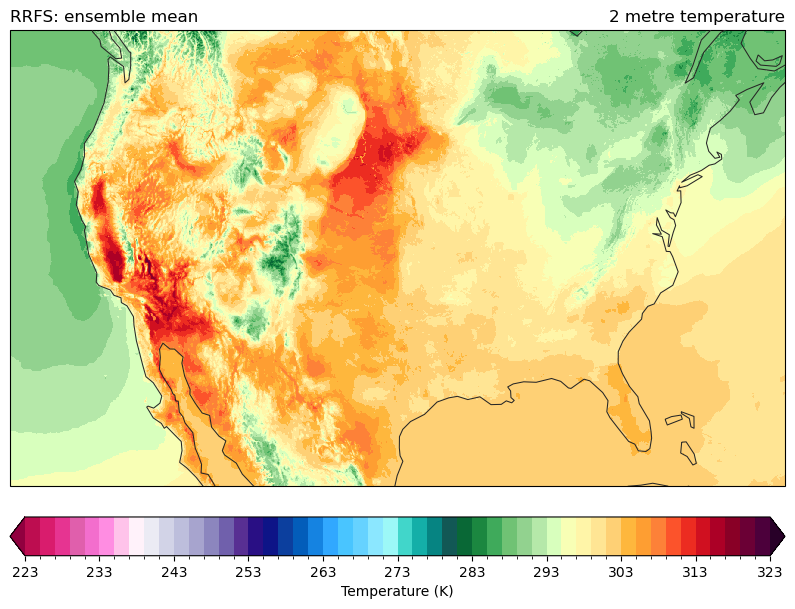

In [8]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{H.model.upper()}: {H.product_description}", loc="left")

## Missing index files
We have to download the full file.

In [9]:
H = Herbie(
    "2021-07-23", model="rrfs", product="testbed.conus", member=1, priority="aws-mem"
)

‚úÖ Found ‚îä model=rrfs ‚îä product=testbed.conus ‚îä 2021-Jul-23 00:00 UTC F00 ‚îä GRIB2 @ aws-mem ‚îä IDX @ aws-mem


In [ ]:
# no index file available. Have to download the full file.
H.download()

‚úÖ Success! Downloaded RRFS from aws-mem             
	src: https://noaa-rrfs-pds.s3.amazonaws.com/rrfs.20210723/00/mem01/rrfs.t00z.mem01.testbed.conusf000.grib2
	dst: /p/cwfs/blaylock/data/rrfs/20210723/mem01/rrfsce.t00z.conus.testbed.conus.f00.grib2


In [ ]:
import xarray

In [ ]:
# Since we have the full file, we need to filter by keys to open the
# variable we want with cfgrib
x = xarray.open_dataset(
    H.get_localFilePath(),
    engine="cfgrib",
    backend_kwargs={
        "filter_by_keys": {"shortName": "2t", "typeOfLevel": "heightAboveGround"}
    },
)

Text(0.0, 1.0, 'RRFS: member 1')

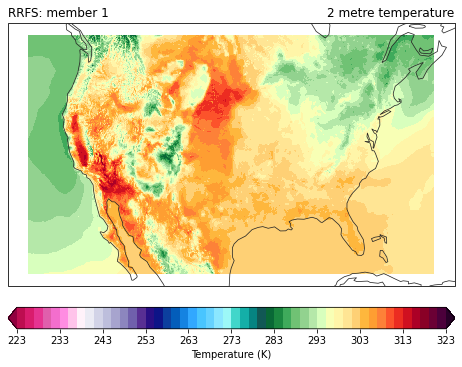

In [ ]:
ax = EasyMap(crs=x.herbie.crs, figsize=[8, 8]).ax
p = ax.pcolormesh(
    x.longitude, x.latitude, x.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(x.t2m.GRIB_name, loc="right")
ax.set_title(f"{H.model.upper()}: member {H.member}", loc="left")

# Grid Mapping
Herbie attempts to parse the CF grid mapping from the GRIB data if it is available. This can be parsed by metpy.

In [10]:
import metpy

In [13]:
crs_info = x.metpy.parse_cf().metpy_crs.item()
crs_info.to_cartopy()

In [14]:
crs_info.to_pyproj()

<Projected CRS: {"$schema": "https://proj.org/schemas/v0.2/projjso ...>
Name: undefined
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich